In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./datasets/data-attendance-1.csv')
df.head()

,A,Score,Y
0,0,69,0.286
1,1,145,0.196
2,0,125,0.261
3,1,86,0.109
4,1,158,0.230


## サマリ

In [3]:
df.describe()

,A,Score,Y
count,50.000000,50.000000,50.00000
mean,0.400000,121.700000,0.26354
std,0.494872,28.136874,0.09747
min,0.000000,51.000000,0.02700
25%,0.000000,105.250000,0.19525
50%,0.000000,120.500000,0.27000
75%,1.000000,142.500000,0.34300
max,1.000000,185.000000,0.42300


## 相関係数

In [4]:
df.corr()

,A,Score,Y
A,1.000000,0.013191,-0.723834
Score,0.013191,1.000000,0.459271
Y,-0.723834,0.459271,1.000000


## スケーリング

In [5]:
df.update(df['Score'] / 200)

## 説明変数における関係の散布図

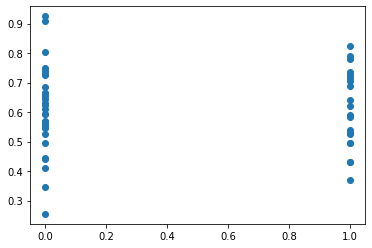

In [6]:
plt.scatter(df['A'], df['Score'])
plt.show()

## 予測モデルの学習

In [7]:
model = LinearRegression()
model.fit(df[['A', 'Score']], df['Y'].values)
pred = model.predict(df[['A', 'Score']])

## 学習モデルの精度算出

In [8]:
mean_squared_error(pred, df['Y'])

0.002385641416113735

## 当てはまりの可視化

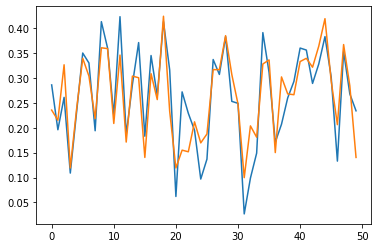

In [9]:
plt.plot(df['Y'])
plt.plot(pred)
plt.show()

In [10]:
pd.DataFrame({
    'Name': ['b1', 'b2', 'b3'],
    'Coefficients': [model.intercept_] + model.coef_.tolist()
})

,Name,Coefficients
0,b1,0.123372
1,b2,-0.143785
2,b3,0.324868
